In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
def linear(n):
    res = np.random.uniform(0,1,(n,2))
    input = []
    label = []
    input.append(res)
    for i in input[0]:
        if(i[0]>i[1]):
            label.append(0)
        else:
            label.append(1)
    
    return input[0] , np.array(label).reshape(n, 1)
def XOR(n):
    res = np.random.randint(0,2,n)
    input = []
    label = []
    for i in range(len(res)):
        if(res[i]==0):
            a =  np.random.uniform(0,1)
            b = a
            input.append(np.array([a,b]))
            label.append(0)
        else:
            a =  np.random.uniform(0,1)
            b = 1-a
            input.append(np.array([a,b]))
            label.append(1)
    return np.array(input) , np.array(label).reshape(n, 1)
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

In [211]:
def network(lr,h1,h2,epoch,dtype):
    if dtype == 'linear':
        x,y = linear(1000)
    elif dtype == 'XOR':
        x,y = XOR(100)

    loss_record=[]
    epoch_record=[]
    
    w1 = np.random.rand(x.shape[1],h1)
    w2 = np.random.rand(h1,h2)
    w3 = np.random.rand(h2,1)
    
    for i in range(1,epoch+1):
        
        #Forward
        z1 = np.dot(x, w1)
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2)
        a2 = sigmoid(z2)
        z3 = np.dot(a2, w3)
        y_pred = sigmoid(z3)
        label_pred = [1 if x >= 0.5 else 0 for x in y_pred]
        
        #Backward
        grad_y_pred = (y_pred - y) / (y_pred * (1 - y_pred)) # cross entropy loss
        grad_z3 = np.multiply(grad_y_pred, derivative_sigmoid(y_pred))
        grad_w3 = np.dot(a2.T, grad_z3)
        grad_a2 = np.dot(grad_z3, w3.T)
        grad_z2 = np.multiply(grad_a2, derivative_sigmoid(a2))
        grad_w2 = np.dot(a1.T, grad_z2)
        grad_a1 = np.dot(grad_z2, w2.T)
        grad_z1 = np.multiply(grad_a1, derivative_sigmoid(a1))
        grad_w1 = np.dot(x.T, grad_z1)

        w1 -= lr * grad_w1
        w2 -= lr * grad_w2
        w3 -= lr * grad_w3
        
        acc = sum([1 if label_pred[j] == y[j] else 0 for j in range(y.shape[0])]) / y.shape[0]
        loss = ((-1)*(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))).sum() # cross entropy loss
        loss_record.append(loss)
        epoch_record.append(i)
        
        if(acc==1):
            print(f'epoch: {i}  loss: {loss} acc: {acc}')
            break
        elif(i%500==0):
            print(f'epoch: {i}  loss: {loss} acc: {acc}')
        
    #plot
    plt.subplot(2,5,1)
    plt.title("Ground Truth")
    plt.ylabel("y") 
    plt.xlabel("x")
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.subplot(2,5,3)
    plt.title("Predict Result")
    plt.ylabel("y") 
    plt.xlabel("x")
    for i in range(x.shape[0]):
        if label_pred[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
                
                
    plt.subplot(2,5,5)
    plt.title("Learing Curve")
    plt.ylabel("Loss") 
    plt.xlabel("Epoch")
    plt.plot(epoch_record,loss_record)
    plt.show()
    
    
    return y_pred

epoch: 500  loss: 188.54165876195088 acc: 0.974
epoch: 1000  loss: 36.46190227324108 acc: 0.995
epoch: 1500  loss: 24.3550331104098 acc: 0.997
epoch: 2000  loss: 19.121829217505926 acc: 0.998
epoch: 2500  loss: 16.063034727639504 acc: 0.999
epoch: 3000  loss: 14.018564659179395 acc: 0.999
epoch: 3500  loss: 12.541754390575441 acc: 0.999
epoch: 4000  loss: 11.418365734377705 acc: 0.999
epoch: 4500  loss: 10.531142692283783 acc: 0.999
epoch: 5000  loss: 9.80999598658618 acc: 0.999
epoch: 5500  loss: 9.210289670523919 acc: 0.999
epoch: 6000  loss: 8.7021956605113 acc: 0.999
epoch: 6500  loss: 8.26500603927672 acc: 0.999
epoch: 6890  loss: 7.963527284952737 acc: 1.0


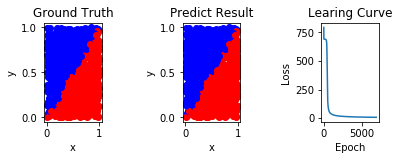

[[9.99203749e-01]
 [1.03556266e-05]
 [6.79773786e-06]
 [9.99995678e-01]
 [3.03003410e-01]
 [1.88287007e-04]
 [4.33335854e-04]
 [9.99986834e-01]
 [9.99993112e-01]
 [9.99991595e-01]]


In [212]:
prediction = network(0.001,3,3,30000,'linear')
print(prediction[:10])

epoch: 500  loss: 68.78631550343539 acc: 0.55
epoch: 1000  loss: 68.73004043380416 acc: 0.55
epoch: 1500  loss: 68.4115235549317 acc: 0.55
epoch: 2000  loss: 63.67428001676271 acc: 0.55
epoch: 2500  loss: 29.053106372295797 acc: 0.85
epoch: 3000  loss: 16.025619111391077 acc: 0.98
epoch: 3500  loss: 12.10326238401545 acc: 0.98
epoch: 4000  loss: 10.594584694502988 acc: 0.99
epoch: 4500  loss: 9.674586233635294 acc: 0.99
epoch: 5000  loss: 8.963297301381322 acc: 0.99
epoch: 5500  loss: 8.339514167778763 acc: 0.99
epoch: 6000  loss: 7.745835720781237 acc: 0.99
epoch: 6500  loss: 7.162588122101785 acc: 0.99
epoch: 7000  loss: 6.6276109990296055 acc: 0.99
epoch: 7500  loss: 6.2001585210701915 acc: 0.99
epoch: 8000  loss: 5.8829936251706245 acc: 0.99
epoch: 8500  loss: 5.640989403541066 acc: 0.99
epoch: 9000  loss: 5.442836192330152 acc: 0.99
epoch: 9500  loss: 5.269363067167359 acc: 0.99
epoch: 10000  loss: 5.109917116960206 acc: 0.99
epoch: 10500  loss: 4.958701781083698 acc: 0.99
epoch: 

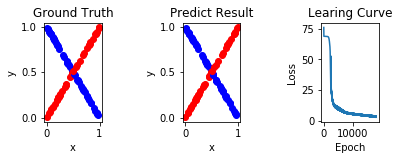

[[9.99999510e-01]
 [1.35266340e-03]
 [3.17285980e-04]
 [4.87238159e-02]
 [9.99993839e-01]
 [9.99986453e-01]
 [9.99989139e-01]
 [9.96506916e-01]
 [9.99985554e-01]
 [1.29935952e-02]]


In [207]:
prediction = network(0.01,3,3,30000,'XOR')
print(prediction[:10])